In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers=1, tol=1e-6, eps=0.05, embedtxt=True)

In [5]:
# pf.session.load_data(name='hospital', src=FILE, fpath='data/hospital_clean_unflatten.csv', check_param=True, na_values='empty')
# pf.session.load_data(name='customer', src=FILE, fpath='experiments/exp1/experiment1_isf_high_dim.csv', check_param=True, na_values='empty')
# pf.session.load_data(name='customer', src=FILE, fpath='aledata/iris.csv', check_param=True, na_values='empty')
pf.session.load_data(name='customer', src=FILE, fpath='../datasets/ncvoter_1001r_19c.csv', check_param=True, na_values='not available')
# pf.session.load_data(name='customer', src=FILE, fpath='aledata/Queens_Library_Branches_20250211.csv', check_param=True, na_values='empty')
# pf.session.load_data(name='customer', src=FILE, fpath='aledata/nursery.csv', check_param=True, na_values='empty')

INFO:profiler.utility:[26.535178899765015] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': 'not available', 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "voter_id": "numeric",
    "voter_reg_num": "numeric",
    "name_prefix": "categorical",
    "first_name": "text",
    "middle_name": "text",
    "last_name": "text",
    "name_suffix": "categorical",
    "age": "numeric",
    "gender": "categorical",
    "race": "categorical",
    "ethnic": "categorical",
    "street_address": "text",
    "city": "text",
    "state": "categorical",
    "zip_code": "numeric",
    "full_phone_num": "text",
    "birth_place": "text",
    "register_date": "text",
    "download_month": "categorical"
}
INFO:profiler.data.dataset:(possible types: numeric, categorical, text, date)
INFO:profiler.data.dataset:i

In [4]:
# we could change the inferred/found types by running the following:

# pf.session.change_dtypes(["voter_id","voter_reg_num","name_prefix","first_name","middle_name","last_name","name_suffix","age","gender","race","ethnic","street_address","city","state","zip_code","full_phone_num","birth_place","register_date","download_month"], 
#                             [CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL, CATEGORICAL])

# pf.session.change_dtypes(['e'], [TEXT])

In [6]:
pf.session.load_embedding(save=True, path='data/', load=False)

INFO:profiler.utility:[29.62391185760498] Load Embedding start

INFO:profiler.data.embedding:[first_name] tokenize cell
INFO:profiler.data.embedding:[first_name] train language model
INFO:profiler.data.embedding:[['rodney'], ['sallie'], ['john'], ['glenda'], ['michele'], ['clarence'], ['elva'], ['adrienne'], ['paula'], ['bryan'], ['doris'], ['rudolf'], ['angelique'], ['helen'], ['gregory'], ['catherine'], ['ruth'], ['kenneth'], ['clarice'], ['emily'], ['agatha'], ['mildred'], ['meredith'], ['edward'], ['kenneth'], ['laura'], ['louise'], ['willie'], ['deborah'], ['james'], ['diane'], ['thelma'], ['theady'], ['susan'], ['mildred'], ['cecil'], ['gwendolyn'], ['kimberly'], ['hazel'], ['dempsey'], ['charles'], ['maurine'], ['walter'], ['janice'], ['doyal'], ['francis'], ['nelson'], ['ralph'], ['addie'], ['fonnie'], ['shirley'], ['billy'], ['katherine'], ['betty'], ['billy'], ['rubye'], ['gay'], ['james'], ['vivian'], ['betty'], ['robert'], ['josephine'], ['diane'], ['lucile'], ['kenneth'], 

corpus [['rodney'], ['sallie'], ['john'], ['glenda'], ['michele'], ['clarence'], ['elva'], ['adrienne'], ['paula'], ['bryan'], ['doris'], ['rudolf'], ['angelique'], ['helen'], ['gregory'], ['catherine'], ['ruth'], ['kenneth'], ['clarice'], ['emily'], ['agatha'], ['mildred'], ['meredith'], ['edward'], ['kenneth'], ['laura'], ['louise'], ['willie'], ['deborah'], ['james'], ['diane'], ['thelma'], ['theady'], ['susan'], ['mildred'], ['cecil'], ['gwendolyn'], ['kimberly'], ['hazel'], ['dempsey'], ['charles'], ['maurine'], ['walter'], ['janice'], ['doyal'], ['francis'], ['nelson'], ['ralph'], ['addie'], ['fonnie'], ['shirley'], ['billy'], ['katherine'], ['betty'], ['billy'], ['rubye'], ['gay'], ['james'], ['vivian'], ['betty'], ['robert'], ['josephine'], ['diane'], ['lucile'], ['kenneth'], ['susan'], ['w'], ['esther'], ['edna'], ['lucille'], ['carrie'], ['gracie'], ['nelson'], ['james'], ['estella'], ['james'], ['leola'], ['norma'], ['albert'], ['rosetta'], ['hanna'], ['willie'], ['taft'], [

INFO:profiler.data.embedding:[first_name] compute weights
INFO:profiler.data.embedding:[first_name] create vector map
INFO:profiler.data.embedding:[first_name] save vec and vocab
INFO:profiler.data.embedding:[middle_name] tokenize cell
INFO:profiler.data.embedding:[middle_name] train language model
INFO:profiler.data.embedding:[['john'], ['wilkins'], ['m'], ['ware'], ['koenig'], ['ervin'], ['minnie'], ['christine'], ['nan'], ['terence'], ['smith'], ['nan'], ['nicole'], ['chamblee'], ['dale'], ['e'], ['bridges'], ['roland'], ['clinard'], ['smith'], ['nan'], ['nan'], ['kae'], ['thomas'], ['nan'], ['frances'], ['anderson'], ['mae'], ['fouts'], ['hal'], ['tilley'], ['almon'], ['earl'], ['marett'], ['irene'], ['lewis'], ['andrea'], ['lynne'], ['waller'], ['nan'], ['e'], ['taylor'], ['cline'], ['stone'], ['delmer'], ['c'], ['james'], ['nan'], ['hoggard'], ['c'], ['anne'], ['joe'], ['a'], ['a'], ['gene'], ['j'], ['hartley'], ['e'], ['v'], ['nan'], ['marshall'], ['parson'], ['stroupe'], ['pogu

corpus [['john'], ['wilkins'], ['m'], ['ware'], ['koenig'], ['ervin'], ['minnie'], ['christine'], ['nan'], ['terence'], ['smith'], ['nan'], ['nicole'], ['chamblee'], ['dale'], ['e'], ['bridges'], ['roland'], ['clinard'], ['smith'], ['nan'], ['nan'], ['kae'], ['thomas'], ['nan'], ['frances'], ['anderson'], ['mae'], ['fouts'], ['hal'], ['tilley'], ['almon'], ['earl'], ['marett'], ['irene'], ['lewis'], ['andrea'], ['lynne'], ['waller'], ['nan'], ['e'], ['taylor'], ['cline'], ['stone'], ['delmer'], ['c'], ['james'], ['nan'], ['hoggard'], ['c'], ['anne'], ['joe'], ['a'], ['a'], ['gene'], ['j'], ['hartley'], ['e'], ['v'], ['nan'], ['marshall'], ['parson'], ['stroupe'], ['pogue'], ['derrel'], ['b'], ['colin'], ['curtiss'], ['mccullen'], ['bowden'], ['m'], ['h'], ['francis'], ['patrick'], ['e'], ['william'], ['w', 'farris'], ['jean', 'sales'], ['m'], ['nan'], ['nan'], ['p'], ['thomas'], ['w'], ['buckner'], ['nan'], ['t'], ['chason'], ['wallace'], ['taylor'], ['j'], ['madeline'], ['eugene'], ['

INFO:profiler.data.embedding:[middle_name] compute weights
INFO:profiler.data.embedding:[middle_name] create vector map
INFO:profiler.data.embedding:[middle_name] save vec and vocab
INFO:profiler.data.embedding:[last_name] tokenize cell
INFO:profiler.data.embedding:[last_name] train language model
INFO:profiler.data.embedding:[['glockner'], ['blanchard'], ['goodson'], ['battle'], ['bullock'], ['hunter'], ['wright'], ['franks'], ['buckner'], ['peterson'], ['bagley'], ['kleeb'], ['ellington'], ['driver'], ['hall'], ['smith'], ['wood'], ['warren'], ['bryant'], ['doty'], ['squire'], ['wooten'], ['payne'], ['hall'], ['mccain'], ['britt'], ['johnson'], ['benton'], ['jarrell'], ['spriggs'], ['tate'], ['broady'], ['james'], ['stephenson'], ['schronce'], ['ford'], ['speller-jacobs'], ['muller'], ['knight'], ['clark'], ['tart'], ['younce'], ['johnson'], ['miller'], ['southerland'], ['keel'], ['alston'], ['quick'], ['garrett'], ['joyner'], ['books'], ['nelson'], ['waterman'], ['chaney'], ['hobbs'

corpus [['glockner'], ['blanchard'], ['goodson'], ['battle'], ['bullock'], ['hunter'], ['wright'], ['franks'], ['buckner'], ['peterson'], ['bagley'], ['kleeb'], ['ellington'], ['driver'], ['hall'], ['smith'], ['wood'], ['warren'], ['bryant'], ['doty'], ['squire'], ['wooten'], ['payne'], ['hall'], ['mccain'], ['britt'], ['johnson'], ['benton'], ['jarrell'], ['spriggs'], ['tate'], ['broady'], ['james'], ['stephenson'], ['schronce'], ['ford'], ['speller-jacobs'], ['muller'], ['knight'], ['clark'], ['tart'], ['younce'], ['johnson'], ['miller'], ['southerland'], ['keel'], ['alston'], ['quick'], ['garrett'], ['joyner'], ['books'], ['nelson'], ['waterman'], ['chaney'], ['hobbs'], ['mitchell'], ['andrews'], ['braswell'], ['rhone'], ['thompson'], ['johnson'], ['haywood'], ['smith'], ['townsend'], ['mcbride'], ['gaskins'], ['doxey'], ['cates'], ['mccolman'], ['baugham'], ['grady'], ['kelley'], ['mccolman'], ['askew'], ['edmonds'], ['brafford'], ['starr'], ['plattenberger'], ['cowan'], ['simmons'

INFO:profiler.data.embedding:[last_name] compute weights
INFO:profiler.data.embedding:[last_name] create vector map
INFO:profiler.data.embedding:[last_name] save vec and vocab
INFO:profiler.data.embedding:[street_address] tokenize cell
INFO:profiler.data.embedding:[street_address] train language model
INFO:profiler.data.embedding:[['1708', 'pembroke', 'jones', 'dr'], ['203', 'e', 'main', 'st'], ['496', 'white', 'flash', 'rd'], ['15360', 'pea', 'bridge', 'rd'], ['242', 'northwood', 'dr'], ['280', 'pender', 'rd'], ['1314', 'tunnel', 'rd'], ['111', 'king', 'richard', 'ct'], ['1140', 'n', 'main', 'st', '#210'], ['164', 'dogwood', 'cir'], ['1309', 'mccarthy', 'blvd', '#104'], ['303', 'windy', 'knoll', 'dr'], ['901', 'n', '20th', 'st'], ['8778', 'driver', 'rd'], ['3362', 'penland', 'rd'], ['410', 'brunswick', 'rd'], ['1605', 'crymes', 'cove', 'rd'], ['1371', 'warren', 'rd'], ['3325', 'groometown', 'rd', '#c'], ['302', 'kenwood', 'ave'], ['6466', 'nc', 'hwy', '46'], ['225', 'gull', 'ave'], ['

corpus [['1708', 'pembroke', 'jones', 'dr'], ['203', 'e', 'main', 'st'], ['496', 'white', 'flash', 'rd'], ['15360', 'pea', 'bridge', 'rd'], ['242', 'northwood', 'dr'], ['280', 'pender', 'rd'], ['1314', 'tunnel', 'rd'], ['111', 'king', 'richard', 'ct'], ['1140', 'n', 'main', 'st', '#210'], ['164', 'dogwood', 'cir'], ['1309', 'mccarthy', 'blvd', '#104'], ['303', 'windy', 'knoll', 'dr'], ['901', 'n', '20th', 'st'], ['8778', 'driver', 'rd'], ['3362', 'penland', 'rd'], ['410', 'brunswick', 'rd'], ['1605', 'crymes', 'cove', 'rd'], ['1371', 'warren', 'rd'], ['3325', 'groometown', 'rd', '#c'], ['302', 'kenwood', 'ave'], ['6466', 'nc', 'hwy', '46'], ['225', 'gull', 'ave'], ['8', 'reese', 'rd'], ['88', 'eds', 'ln'], ['2411', 'thomas', 'ave'], ['1104', 'w', '24th', 'st'], ['113', 'gentry', 'st', '#20'], ['306', 'woodlake', 'dr'], ['159', 'stencil', 'ln'], ['2314', 'hillford', 'dr'], ['5700', 'seward', 'rd'], ['115', 's', 'brookwood', 'ave'], ['3523', 'worley', 'st'], ['202', 'view', 'st', '#a'], 

INFO:profiler.data.embedding:[street_address] compute weights
INFO:profiler.data.embedding:[street_address] create vector map
INFO:profiler.data.embedding:[street_address] save vec and vocab
INFO:profiler.data.embedding:[city] tokenize cell
INFO:profiler.data.embedding:[city] train language model
INFO:profiler.data.embedding:[['wilmington'], ['rose', 'hill'], ['mt', 'olive'], ['laurinburg'], ['whiteville'], ['spring', 'lake'], ['asheville'], ['jacksonville'], ['marshall'], ['burnsville'], ['new', 'bern'], ['hendersonville'], ['morehead', 'city'], ['zebulon'], ['spruce', 'pine'], ['fayetteville'], ['waynesville'], ['faison'], ['greensboro'], ['wilmington'], ['garysburg'], ['east', 'flat', 'rock'], ['asheville'], ['sanford'], ['new', 'bern'], ['lumberton'], ['north', 'wilkesboro'], ['greensboro'], ['mount', 'airy'], ['burlington'], ['pfafftown'], ['rockingham'], ['fayetteville'], ['black', 'mountain'], ['sanford'], ['newton'], ['windsor'], ['wilmington'], ['advance'], ['fayetteville'], [

corpus [['wilmington'], ['rose', 'hill'], ['mt', 'olive'], ['laurinburg'], ['whiteville'], ['spring', 'lake'], ['asheville'], ['jacksonville'], ['marshall'], ['burnsville'], ['new', 'bern'], ['hendersonville'], ['morehead', 'city'], ['zebulon'], ['spruce', 'pine'], ['fayetteville'], ['waynesville'], ['faison'], ['greensboro'], ['wilmington'], ['garysburg'], ['east', 'flat', 'rock'], ['asheville'], ['sanford'], ['new', 'bern'], ['lumberton'], ['north', 'wilkesboro'], ['greensboro'], ['mount', 'airy'], ['burlington'], ['pfafftown'], ['rockingham'], ['fayetteville'], ['black', 'mountain'], ['sanford'], ['newton'], ['windsor'], ['wilmington'], ['advance'], ['fayetteville'], ['linden'], ['lenoir'], ['north', 'wilkesboro'], ['reidsville'], ['fayetteville'], ['oak', 'city'], ['littleton'], ['laurel', 'hill'], ['windsor'], ['sanford'], ['flat', 'rock'], ['canton'], ['durham'], ['havelock'], ['monroe'], ['st', 'pauls'], ['boomer'], ['charlotte'], ['fayetteville'], ['halifax'], ['etowah'], ['mt'

INFO:profiler.data.embedding:[city] compute weights
INFO:profiler.data.embedding:[city] create vector map
INFO:profiler.data.embedding:[city] save vec and vocab
INFO:profiler.data.embedding:[full_phone_num] tokenize cell
INFO:profiler.data.embedding:[full_phone_num] train language model
INFO:profiler.data.embedding:[['910', '509', '3864'], ['910', '289', '3320'], ['910', '658', '3413'], ['nan'], ['nan'], ['nan'], ['828', '298', '5912'], ['910', '526', '8223'], ['nan'], ['828', '682', '4054'], ['252', '638', '8502'], ['828', '891', '9713'], ['252', '269', '5257'], ['252', '235', '5792'], ['828', '765', '6371'], ['nan'], ['nan'], ['910', '267', '4491'], ['nan'], ['910', '762', '4243'], ['nan'], ['nan'], ['nan'], ['nan'], ['252', '638', '5283'], ['nan'], ['nan'], ['nan'], ['336', '789', '3447'], ['nan'], ['nan'], ['nan'], ['910', '822', '6089'], ['828', '669', '2870'], ['nan'], ['704', '462', '2445'], ['252', '794', '2993'], ['336', '324', '0449'], ['nan'], ['910', '868', '3577'], ['910',

corpus [['910', '509', '3864'], ['910', '289', '3320'], ['910', '658', '3413'], ['nan'], ['nan'], ['nan'], ['828', '298', '5912'], ['910', '526', '8223'], ['nan'], ['828', '682', '4054'], ['252', '638', '8502'], ['828', '891', '9713'], ['252', '269', '5257'], ['252', '235', '5792'], ['828', '765', '6371'], ['nan'], ['nan'], ['910', '267', '4491'], ['nan'], ['910', '762', '4243'], ['nan'], ['nan'], ['nan'], ['nan'], ['252', '638', '5283'], ['nan'], ['nan'], ['nan'], ['336', '789', '3447'], ['nan'], ['nan'], ['nan'], ['910', '822', '6089'], ['828', '669', '2870'], ['nan'], ['704', '462', '2445'], ['252', '794', '2993'], ['336', '324', '0449'], ['nan'], ['910', '868', '3577'], ['910', '488', '5740'], ['nan'], ['nan'], ['336', '342', '1577'], ['910', '868', '2419'], ['nan'], ['252', '586', '6371'], ['843', '599', '0861'], ['nan'], ['nan'], ['828', '891', '4342'], ['828', '648', '6333'], ['nan'], ['252', '447', '2284'], ['nan'], ['nan'], ['nan'], ['nan'], ['nan'], ['nan'], ['828', '891', '7

INFO:profiler.data.embedding:[full_phone_num] compute weights
INFO:profiler.data.embedding:[full_phone_num] create vector map
INFO:profiler.data.embedding:[full_phone_num] save vec and vocab
INFO:profiler.data.embedding:[birth_place] tokenize cell
INFO:profiler.data.embedding:[birth_place] train language model
INFO:profiler.data.embedding:[['nj'], ['nc'], ['nc'], ['nan'], ['pa'], ['nc'], ['nan'], ['va'], ['nc'], ['nc'], ['ri'], ['nan'], ['nj'], ['nc'], ['nc'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['va'], ['nan'], ['nc'], ['nc'], ['il'], ['md'], ['nc'], ['nc'], ['nc'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['ga'], ['nan'], ['nc'], ['nc'], ['nc'], ['ga'], ['nan'], ['nan'], ['nc'], ['nc'], ['nc'], ['in'], ['nc'], ['ny'], ['nc'], ['nan'], ['nan'], ['nc'], ['nc'], ['nan'], ['nan'], ['ny'], ['nc'], ['nan'], ['nan'], ['il'], ['nc'], ['nc'], ['ny'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nan'], ['nc'], ['nan'], ['nan'], ['ny'], ['nc'],

corpus [['nj'], ['nc'], ['nc'], ['nan'], ['pa'], ['nc'], ['nan'], ['va'], ['nc'], ['nc'], ['ri'], ['nan'], ['nj'], ['nc'], ['nc'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['va'], ['nan'], ['nc'], ['nc'], ['il'], ['md'], ['nc'], ['nc'], ['nc'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['ga'], ['nan'], ['nc'], ['nc'], ['nc'], ['ga'], ['nan'], ['nan'], ['nc'], ['nc'], ['nc'], ['in'], ['nc'], ['ny'], ['nc'], ['nan'], ['nan'], ['nc'], ['nc'], ['nan'], ['nan'], ['ny'], ['nc'], ['nan'], ['nan'], ['il'], ['nc'], ['nc'], ['ny'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['nan'], ['nc'], ['nan'], ['nan'], ['ny'], ['nc'], ['nan'], ['nc'], ['nan'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nc'], ['ga'], ['nan'], ['md'], ['nc'], ['nc'], ['oh'], ['nc'], ['nan'], ['oh'], ['nc'], ['nan'], ['ny'], ['nan'], ['nc'], ['nc'], ['nc'], ['nc'], ['nan'], ['nc'], ['ny'], ['nc'], ['nc'], ['nc'], ['nan'], ['nc'], ['nc'], ['nan'], ['oc'], ['nc'], ['nc'], ['nc'], ['n

INFO:profiler.data.embedding:[birth_place] compute weights
INFO:profiler.data.embedding:[birth_place] create vector map
INFO:profiler.data.embedding:[birth_place] save vec and vocab
INFO:profiler.data.embedding:[register_date] tokenize cell
INFO:profiler.data.embedding:[register_date] train language model
INFO:profiler.data.embedding:[['01/01/1930'], ['01/01/1930'], ['01/01/1930'], ['10/01/1930'], ['10/01/1930'], ['06/03/1930'], ['03/04/1930'], ['10/04/1930'], ['04/06/1930'], ['04/06/1930'], ['08/09/1930'], ['11/09/1930'], ['08/10/1930'], ['02/13/1930'], ['03/17/1930'], ['07/17/1930'], ['04/18/1930'], ['12/20/1930'], ['07/21/1930'], ['11/21/1930'], ['04/24/1930'], ['04/24/1930'], ['07/24/1930'], ['10/26/1930'], ['06/27/1930'], ['02/28/1930'], ['05/28/1930'], ['03/29/1930'], ['07/29/1930'], ['09/29/1930'], ['09/29/1930'], ['09/29/1930'], ['09/29/1930'], ['09/29/1930'], ['10/29/1930'], ['11/29/1930'], ['09/30/1930'], ['02/01/1931'], ['05/01/1931'], ['01/02/1931'], ['08/03/1931'], ['08/05

corpus [['01/01/1930'], ['01/01/1930'], ['01/01/1930'], ['10/01/1930'], ['10/01/1930'], ['06/03/1930'], ['03/04/1930'], ['10/04/1930'], ['04/06/1930'], ['04/06/1930'], ['08/09/1930'], ['11/09/1930'], ['08/10/1930'], ['02/13/1930'], ['03/17/1930'], ['07/17/1930'], ['04/18/1930'], ['12/20/1930'], ['07/21/1930'], ['11/21/1930'], ['04/24/1930'], ['04/24/1930'], ['07/24/1930'], ['10/26/1930'], ['06/27/1930'], ['02/28/1930'], ['05/28/1930'], ['03/29/1930'], ['07/29/1930'], ['09/29/1930'], ['09/29/1930'], ['09/29/1930'], ['09/29/1930'], ['09/29/1930'], ['10/29/1930'], ['11/29/1930'], ['09/30/1930'], ['02/01/1931'], ['05/01/1931'], ['01/02/1931'], ['08/03/1931'], ['08/05/1931'], ['09/05/1931'], ['04/08/1931'], ['11/08/1931'], ['03/15/1931'], ['04/16/1931'], ['12/16/1931'], ['03/17/1931'], ['04/18/1931'], ['07/18/1931'], ['12/18/1931'], ['07/20/1931'], ['07/22/1931'], ['08/22/1931'], ['10/23/1931'], ['08/26/1931'], ['09/27/1931'], ['10/28/1931'], ['08/29/1931'], ['11/29/1931'], ['04/30/1931'], 

INFO:profiler.data.embedding:[register_date] compute weights
INFO:profiler.data.embedding:[register_date] create vector map
INFO:profiler.data.embedding:[register_date] save vec and vocab
INFO:profiler.utility:[39.093605041503906] Load Embedding execution time: 9.469693183898926



In [7]:
# load traning data

pf.session.load_training_data(multiplier = None, difference=True)

INFO:profiler.utility:[91.59338164329529] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 12 to bound the error in inv cov estimation <= 0.05000000
INFO:profiler.data.transformer:use multiplier = 12, and the bound is 0.00112114
INFO:profiler.data.transformer:Using multiplier 12
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 19/19 [00:00<00:00, 689.64it/s]
INFO:profiler.data.transformer:Number of training samples: 19000
INFO:profiler.data.transformer:Computing Differences
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0000
INFO:profiler.utility:[92.24403595924377] Create Training Data execution time: 0.6506543159484863



In [8]:
autoregress_matrix = pf.session.learn_structure(sparsity=0, infer_order=True)

INFO:profiler.utility:[101.11951756477356] Learn Structure start

INFO:profiler.learner:use threshold 1.2134
INFO:profiler.utility:[101.16327905654907] Learn Structure execution time: 0.043761491775512695



In [9]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[103.84677815437317] Get Dependencies start

INFO:profiler.utility:[103.87545895576477] Get Dependencies execution time: 0.028680801391601562



name_prefix -> name_suffix (0.0939953175045276)
name_prefix,name_suffix -> race (0.12411846062534447)
name_prefix,name_suffix,race -> ethnic (0.0943076806246165)
name_prefix,race -> download_month (0.22216811871368028)
race,download_month -> register_date (0.20165082282021965)
register_date -> street_address (0.005696761923838868)
street_address -> city (0.11829120817624754)
street_address,city -> last_name (0.023550214760959285)
gender -> first_name (0.03336514110651505)
{'voter_reg_num': array([], dtype=object), 'middle_name': array([], dtype=object), 'age': array([], dtype=object), 'full_phone_num': array([], dtype=object), 'birth_place': array([], dtype=object), 'name_prefix': array([], dtype=object), 'name_suffix': array(['name_prefix'], dtype=object), 'race': array(['name_prefix', 'name_suffix'], dtype=object), 'ethnic': array(['name_prefix', 'name_suffix', 'race'], dtype=object), 'download_month': array(['name_prefix', 'race'], dtype=object), 'register_date': array(['race', 'dow

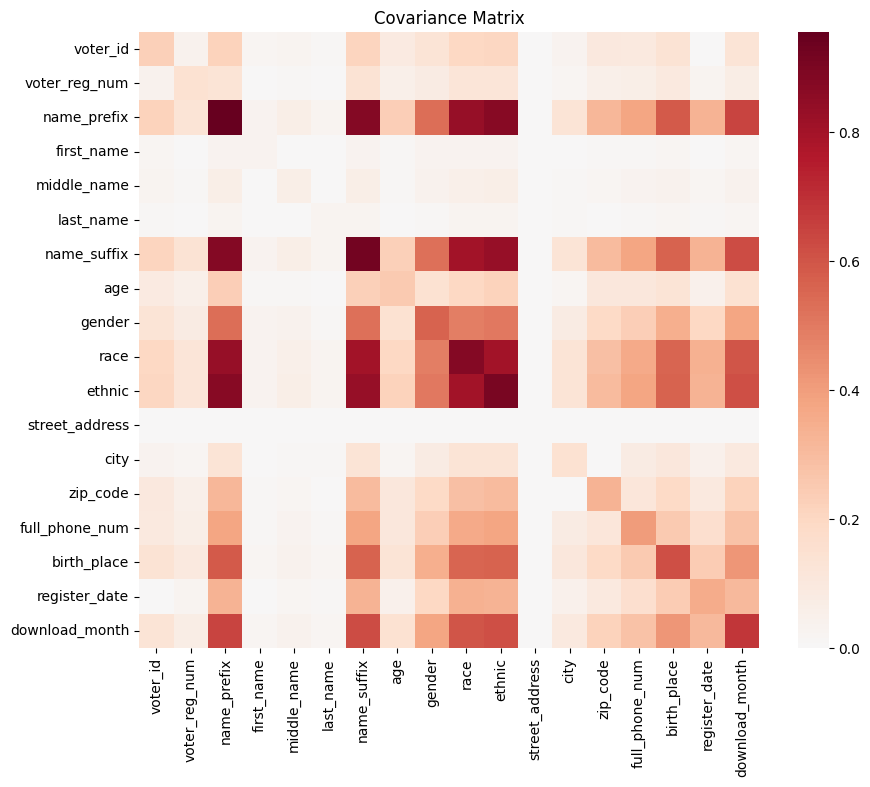

In [10]:
pf.session.visualize_covariance()

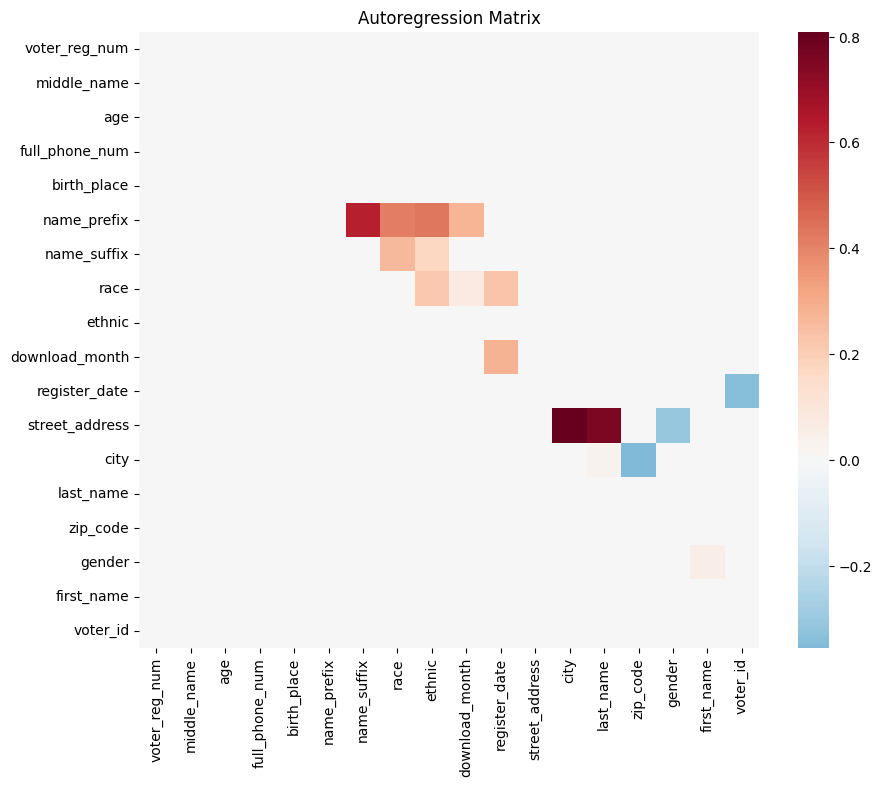

In [11]:
pf.session.visualize_autoregression()

In [12]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,2.068348,start: Load Data,0.000000
1,10.816067,start: Load Data,0.000000
2,26.535179,start: Load Data,0.000000
3,26.560802,end: Load Data,0.025623
4,29.623912,start: Load Embedding,0.000000
5,39.093605,end: Load Embedding,9.469693
6,91.593382,start: Create Training Data,0.000000
7,92.244036,end: Create Training Data,0.650654
8,101.119518,start: Learn Structure,0.000000
9,101.163279,end: Learn Structure,0.043761


In [16]:
pf.session.timer.to_csv()
